# **Exercise 07: heatmap**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt

Import allowed entities:

In [4]:
from typing import Any
from pandas import DataFrame
from sqlite3 import Connection
from matplotlib.image import AxesImage
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import AxesDivider

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

## Analyze only the users and not the admins.

## Use the table `checker` for your query.

Create a query:

In [8]:
sql_q: str = """
             SELECT
                 *
             FROM
                 checker
             WHERE
                 checker.uid LIKE 'user_%';
             """

Run a query:

In [9]:
df: DataFrame = pd.io.sql.read_sql(
    sql_q,
    conn,
    parse_dates=["timestamp", ],
)

Chech a result:

In [10]:
df.head()

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4


Add necessary *Pandas* dataframe columns:

In [11]:
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.dayofweek

Check updated *Pandas* dataframe:

In [12]:
df.head()

,index,status,success,timestamp,numTrials,labname,uid,hour,weekday
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,4


Create a list of useless *Pandas* dataframe columns: `index`, `status`, `success`, `timestamp`, `numTrials`, `labname`:

In [13]:
useless_cols: list = [
    "index",
    "status",
    "success",
    "labname",
    "timestamp",
    "numTrials",
]

Drop them:

In [14]:
df = df.drop(columns=useless_cols, )

Check updated *Pandas* dataframe:

In [15]:
df.head()

,uid,hour,weekday
0,user_4,5,4
1,user_4,5,4
2,user_4,5,4
3,user_4,5,4
4,user_4,5,4


Create a temporary *Pandas* dataframe column for calculation a commits:

In [16]:
df["tmp"] = 1

Check updated *Pandas* dataframe:

In [17]:
df.head()

,uid,hour,weekday,tmp
0,user_4,5,4,1
1,user_4,5,4,1
2,user_4,5,4,1
3,user_4,5,4,1
4,user_4,5,4,1


## Use absolute values of the commits, not the averages.

Create a weekdays and hours pivot tables:

In [18]:
weekdays_df: DataFrame = pd.pivot_table(
    data=df.drop(columns=["hour", ], ),
    index="weekday",
    columns="uid",
    aggfunc="sum",
    values="tmp",
    fill_value=0,
)
hours_df: DataFrame = pd.pivot_table(
    data=df.drop(columns=["weekday", ], ),
    index="hour",
    columns="uid",
    aggfunc="sum",
    values="tmp",
    fill_value=0,
)

Check them:

In [19]:
weekdays_df.head()

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
weekday,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,2,3,50,0,10,8,...,0,0,9,46,2,5,35,1,0,0
1,0,0,16,0,1,57,87,0,5,4,...,0,7,26,11,3,0,86,0,5,0
2,0,1,37,0,0,0,0,0,0,1,...,0,44,32,0,1,0,33,4,3,0
3,0,39,77,0,7,4,17,5,14,17,...,15,12,25,7,20,7,108,2,0,15
4,0,0,1,0,0,0,0,0,0,0,...,0,7,1,59,3,35,61,0,0,0


In [20]:
hours_df.head()

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
hour,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,2,0,2,0,0
1,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
6,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Sort the dataframes by the total number of commits made by a user:

In [21]:
weekdays_df = weekdays_df[weekdays_df.sum(axis=0, ).sort_values(ascending=False, ).index]

In [22]:
hours_df = hours_df[hours_df.sum(axis=0, ).sort_values(ascending=False, ).index]

Check them:

In [23]:
weekdays_df.head()

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
0,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3
1,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
2,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
3,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
4,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0


In [24]:
hours_df.head()

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create a list of weekdays:

In [25]:
weekdays: list = [
    "Mon",
    "Tue",
    "Wed",
    "Thu",
    "Fri",
    "Sat",
    "Sun",
]

Change *Pandas* dataframe indexes to a weekdays:

In [26]:
weekdays_df.index = weekdays

Check updated *Pandas* dataframe:

In [27]:
weekdays_df.head()

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0


## Choose the color palette for both of the graphs that will need to draw.

Create a function for plotting heatmap:

In [28]:

def plot_heatmap(
    data: DataFrame,
    cmap: str,
    figsize: tuple = (16, 8, )
) -> None:
    """
    ...
    """

    fig, ax = plt.subplots(figsize=figsize, )
    img: AxesImage = ax.imshow(
        data,
        cmap=cmap,
        aspect="auto",
    )
    divider: AxesDivider = make_axes_locatable(ax, )
    cax: Any = divider.append_axes(
        "right",
        pad=0.1,
        size="5%",
    )

    plt.colorbar(img, cax=cax, )
    ax.set_xticks(range(len(data.columns, ), ), )
    ax.set_xticklabels(data.columns, rotation=90, )
    ax.set_yticks(range(len(data.index, ), ), )
    ax.set_yticklabels(data.index, )
    fig.set_facecolor("lightgrey", )

Plot heatmaps:

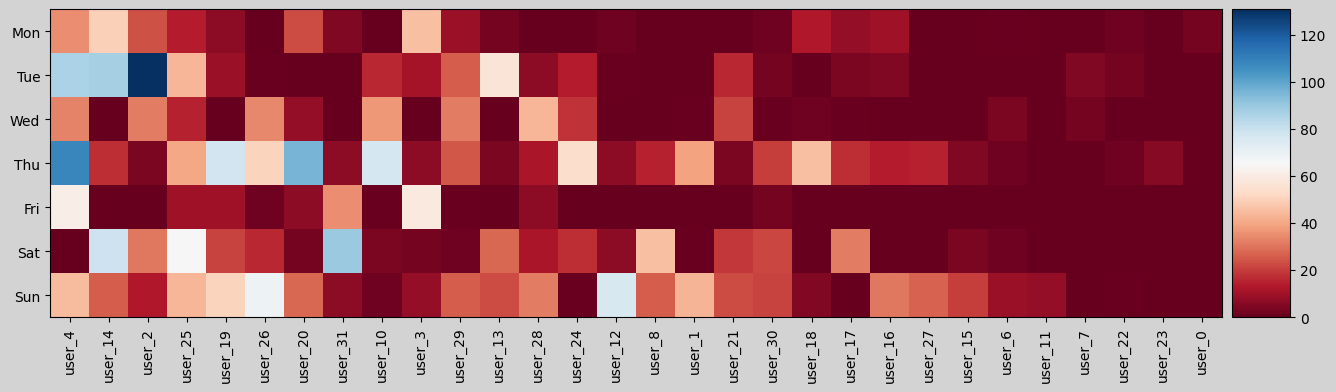

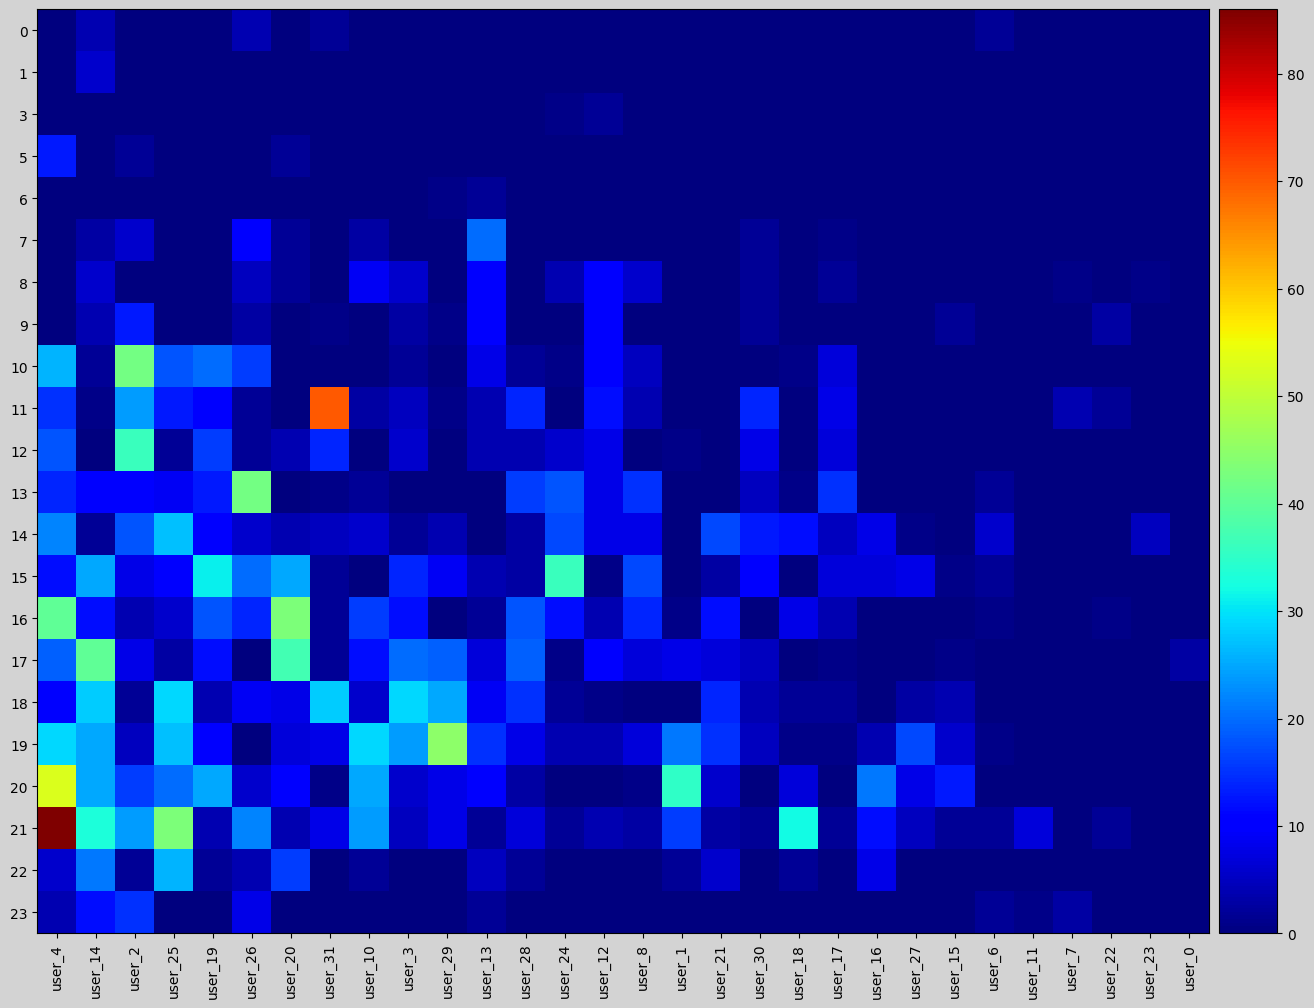

In [29]:
plot_heatmap(
    weekdays_df,
    cmap="RdBu",
    figsize=(16, 4, ),
)
plot_heatmap(
    hours_df,
    cmap="jet",
    figsize=(16, 12, ),
)

## At the end of your *Jupyter Notebook* create a markdown cell and insert the questions:

* `"Which user has the most commits on Tue?"`

The `user_2` has the most commits on `Tue`.

* `"Which user has the most commits on Thu?"`

The `user_4` has the most commits on `Thu`.

* `"On which weekday do the users not like making a lot of commits?"`

On `Mon` users do not like making a lot of commits.

* `"Which user at which hour made the largest number of commits?"`

The `user_4` at `21` hour made the largest number of commits.

Close the connection to the database:

In [30]:
conn.close()